# Omer Kamal Ali Ebead

# Preprocessing


In [1]:
!pip install -q --upgrade keras-cv
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 18.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow import data as tf_data
import tensorflow_datasets as tfds
import keras
import keras_cv
import numpy as np
from keras_cv import bounding_box
import os
from keras_cv import visualization
import tqdm
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Denoiser ( clearer descriptions in the pdf reports )


In [ ]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=10, resize=1.0, slice_=(slice(60, 188), slice(60, 188)), color=True)


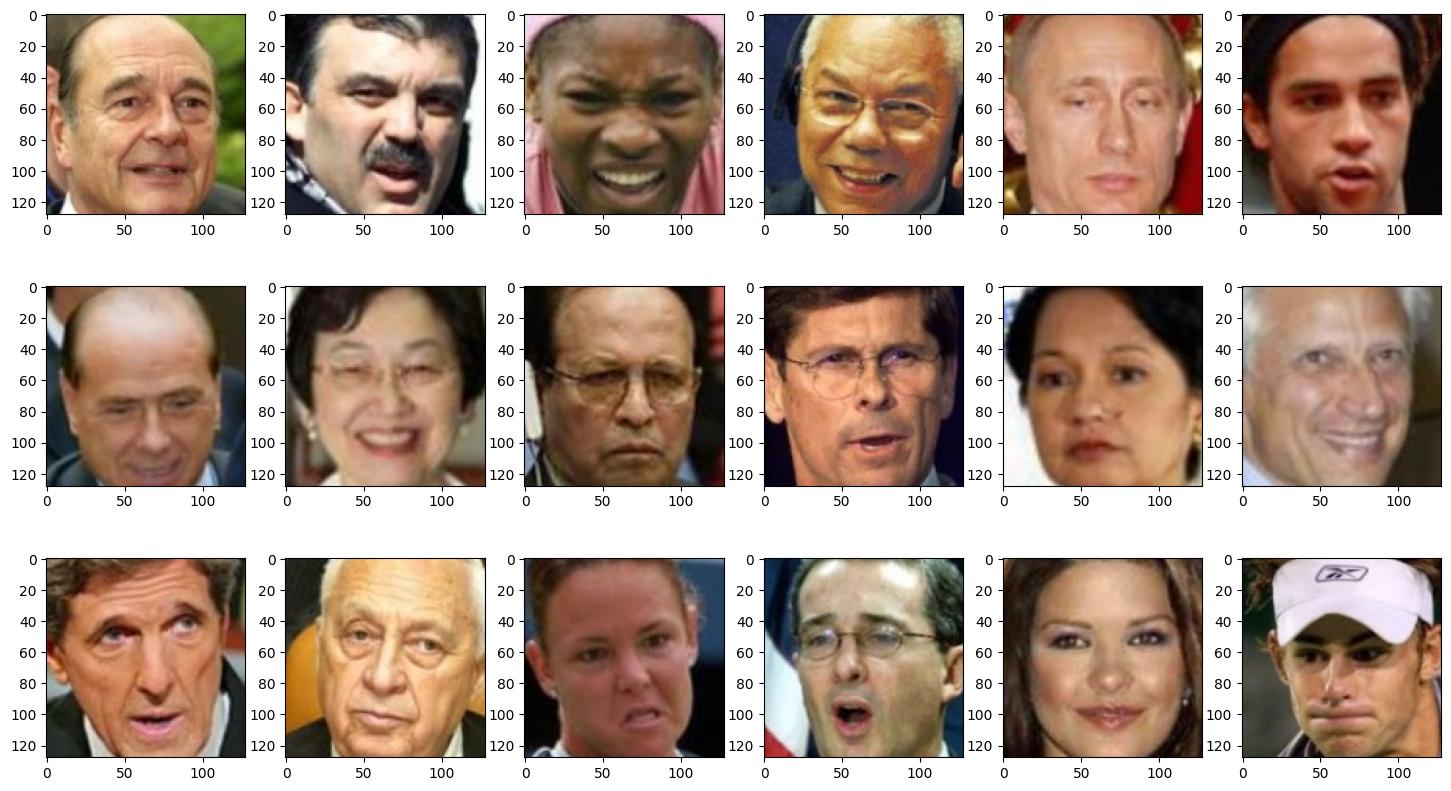

In [ ]:
fig, ax = plt.subplots(3, 6, figsize=(18, 10))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i])

In [ ]:
faces.target.shape

(4324,)

In [ ]:
faces.images.shape

(4324, 128, 128, 3)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(faces.images, faces.target, train_size=0.8,random_state=42)

In [ ]:
x_train.shape

(3459, 128, 128, 3)

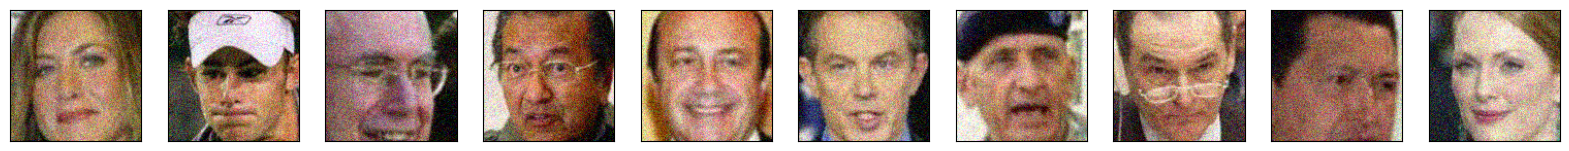

In [ ]:
noise = 0.1
x_train_noisy = x_train +   np.random.normal(loc=0.0, scale=1.0 * noise, size=x_train.shape)
x_test_noisy = x_test +  np.random.normal(loc=0.0, scale=1.0 * noise, size=x_test.shape)

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from keras import layers
input_img = keras.Input(shape=(128, 128, 3))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.AveragePooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.AveragePooling2D((2, 2), padding='same')(x)



x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
autoencoder.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_15                 │ (None, 64, 64, 32)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_16                 │ (None, 32, 32, 32)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_23 (UpSampling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_24 (UpSampling2D)      │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 128, 128, 3)         │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,499 (259.76 KB)

 Trainable params: 66,499 (259.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = autoencoder.fit(x_train_noisy[350:], x_train[350:],
                epochs=50,
                batch_size=64,
                shuffle=True,
                validation_data=(x_train_noisy[:350], x_train[:350]),
                )


Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 358ms/step - accuracy: 0.9020 - loss: 0.0411 - val_accuracy: 0.8944 - val_loss: 0.0081
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - accuracy: 0.8913 - loss: 0.0072 - val_accuracy: 0.8874 - val_loss: 0.0049
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.8973 - loss: 0.0044 - val_accuracy: 0.9108 - val_loss: 0.0029
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.9181 - loss: 0.0029 - val_accuracy: 0.9261 - val_loss: 0.0022
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.9325 - loss: 0.0021 - val_accuracy: 0.9290 - val_loss: 0.0019
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.9332 - loss: 0.0018 - val_accuracy: 0.9316 - val_loss: 0.0017
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.9371 - loss: 0.0017 - val_accuracy: 0.9345 - val_loss: 0.0017
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.9399 - loss: 0.0015 - val_accurac

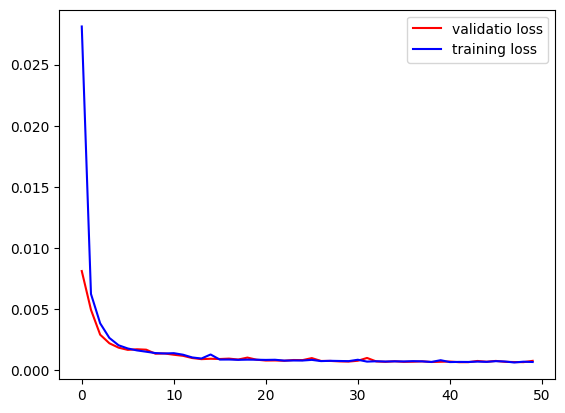

In [ ]:
h = history.history
plt.plot(h['val_loss'],'r')
plt.plot(h['loss'],'b')
plt.legend(['validatio loss','training loss'])
plt.show()

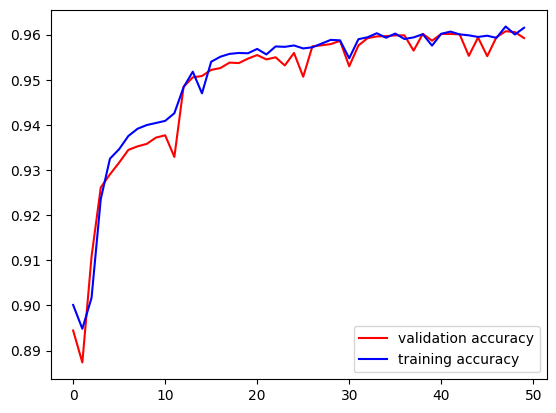

In [ ]:
plt.plot(h['val_accuracy'],'r')
plt.plot(h['accuracy'],'b')
plt.legend(['validation accuracy','training accuracy'])
plt.show()

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


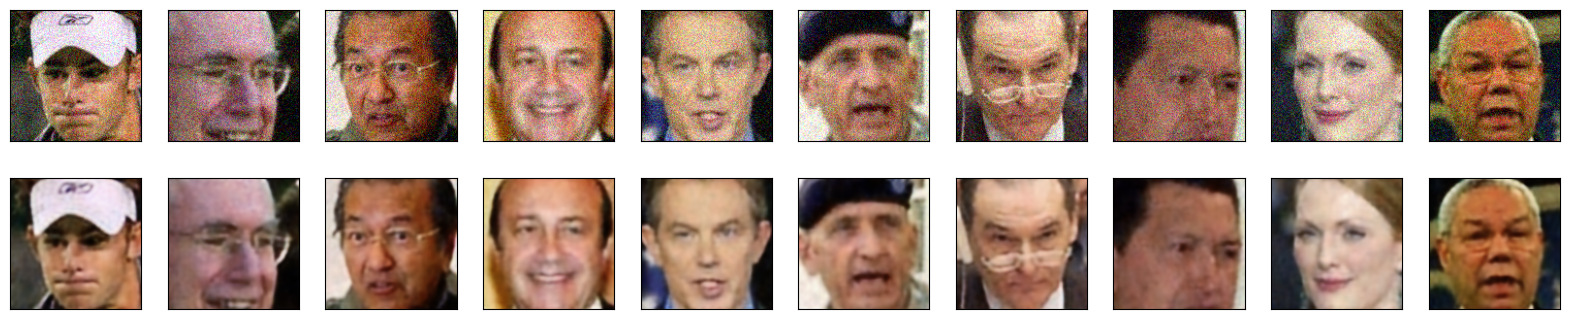

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
test = autoencoder.evaluate(x_test_noisy,x_test,batch_size=64)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.9602 - loss: 7.4194e-04


# Object detection using YOLO ( clearer descriptions in the pdf reports )

In [5]:
images = ['/content/drive/MyDrive/Master/Computer vision/Assignment 2/test imgs/sheep bird.jpg',
          '/content/drive/MyDrive/Master/Computer vision/Assignment 2/test imgs/sheep bird 2.jpg',
          '/content/drive/MyDrive/Master/Computer vision/Assignment 2/test imgs/sheep bird3.jpg',

          ]

images_results= []

In [6]:
pretrained_model = keras_cv.models.YOLOV8Detector.from_preset(
    "yolo_v8_m_pascalvoc", bounding_box_format="xywh"
)


100%|██████████| 2.27k/2.27k [00:00<00:00, 2.98MB/s]


100%|██████████| 99.5M/99.5M [00:00<00:00, 169MB/s]


In [7]:
inference_resizing = keras_cv.layers.Resizing(
    640, 640, pad_to_aspect_ratio=True, bounding_box_format="xywh"
)
class_ids = [
    "Aeroplane",
    "Bicycle",
    "Bird",
    "Boat",
    "Bottle",
    "Bus",
    "Car",
    "Cat",
    "Chair",
    "Cow",
    "Dining Table",
    "Dog",
    "Horse",
    "Motorbike",
    "Person",
    "Potted Plant",
    "Sheep",
    "Sofa",
    "Train",
    "Tvmonitor",
    "Total",
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))


1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


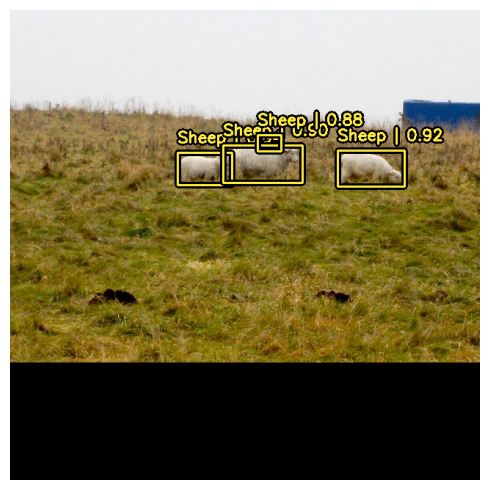

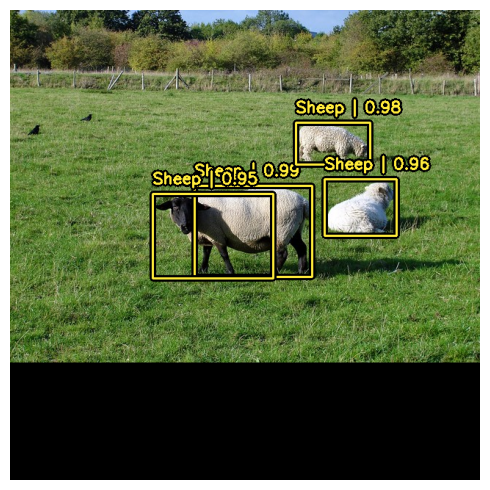

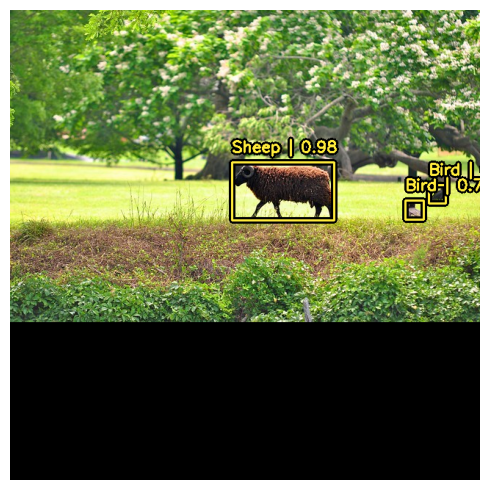

In [8]:
for i in range(len(images)):
  test = Image.open(images[i])
  image = np.array(test)
  image_batch = inference_resizing([image])
  y_pred = pretrained_model.predict(image_batch)
  visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=class_mapping
)
  images_results.append(y_pred)


In [9]:
scores = []
for i in range(len(images_results)):
  scores.append([])
  for j in range(len(images_results[i]['confidence'][0])) :
    if images_results[i]['classes'][0][j] == -1:
      continue
    else:
      scores[i].append( (images_results[i]['confidence'][0][j] , class_ids[images_results[i]['classes'][0][j]],images_results[i]['boxes'][0][j] ) )


In [10]:
scores[0][0][2]

array([228.24442 , 194.75839 ,  73.878784,  43.30397 ], dtype=float32)

In [11]:
import cv2
import sys

def drawBoundingBoxes(imageData, imageOutputPath, inferenceResults):
    for res in inferenceResults:
        left = int(res['left'])
        top = int(res['top'])
        right = int(res['left']) + int(res['width'])
        bottom = int(res['top']) + int(res['height'])
        label = res['label']
        imgHeight, imgWidth, _ = imageData.shape
        thick = int((imgHeight + imgWidth) // 900)
        cv2.rectangle(imageData,(left, top), (right, bottom), res['color'], thick)
        cv2.putText(imageData, label, (left, top - 12), 0, 1e-3 * imgHeight, res['color'], thick//3)
    cv2.imwrite(imageOutputPath, imageData)
    cv2_imshow(imageData)


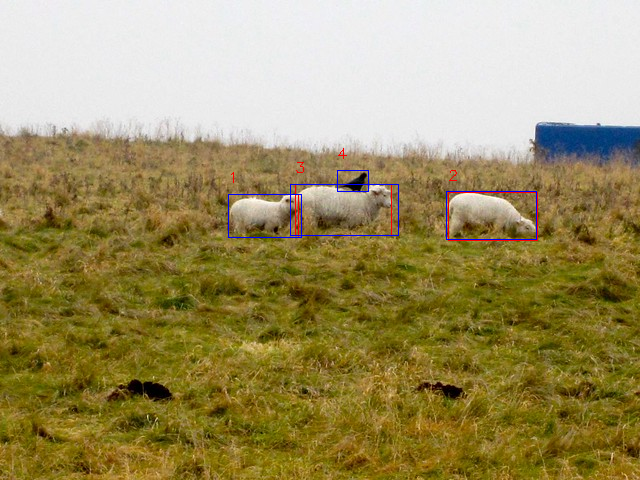

In [12]:


imgcv = cv2.imread('/content/drive/MyDrive/Master/Computer vision/Assignment 2/test imgs/sheep bird.jpg')

color = (0,0,255)
results = [
{
"left": 228,
"top": 194,
"width": 70,
"height": 43,
"label": "1",
"color" : (0,0,255)
},
{
"left": 448,
"top": 192,
"width": 89,
"height": 48,
"label": "2",
  "color" : (0,0,255)

}
,
{
"left": 295,
"top": 184,
"width": 96,
"height": 51,
"label": "3",
  "color" : (0,0,255)
},
{
"left": 337,
"top": 170,
"width": 31,
"height": 21,
"label": "4",
"color" : (0,0,255)
}

]

for i in range(len(scores[0])):
  results.append(
      {
    "left": scores[0][i][2][0],
    "top": scores[0][i][2][1],
    "width": scores[0][i][2][2],
    "height": scores[0][i][2][3],
    "label": "",
  "color" : (255,0,0)
  }
  )

#  [446.77637 , 191.76416 ,  90.38379 ,  48.91095 ],
#         [290.07745 , 184.21776 , 108.23135 ,  51.41365 ],
#         [337.46216 , 170.90738 ,  31.930634,  21.82515 ],
drawBoundingBoxes(imgcv, './output.png', results)


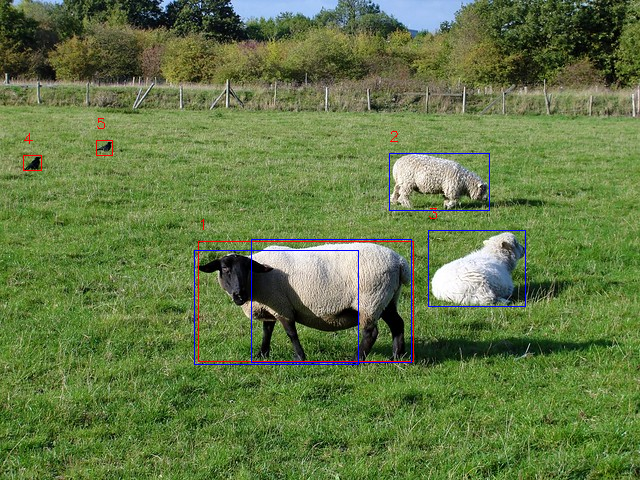

In [13]:


imgcv = cv2.imread('/content/drive/MyDrive/Master/Computer vision/Assignment 2/test imgs/sheep bird 2.jpg')

color = (0,0,255)
results = [
{
"left": 198,
"top": 241,
"width": 215,
"height": 120,
"label": "1",
  "color" : (0,0,255)

},
{
"left": 389,
"top": 153,
"width": 100,
"height": 57,
"label": "2",
  "color" : (0,0,255)

}
,
{
"left": 428,
"top": 230,
"width": 97,
"height": 76,
"label": "3",
  "color" : (0,0,255)

},
{
"left": 23,
"top": 155,
"width": 18,
"height": 15,
"label": "4",
  "color" : (0,0,255)

},
{
"left": 96,
"top": 140,
"width": 16,
"height": 15,
"label": "5",
  "color" : (0,0,255)

}

]

for i in range(len(scores[1])):
  results.append(
      {
    "left": scores[1][i][2][0],
    "top": scores[1][i][2][1],
    "width": scores[1][i][2][2],
    "height": scores[1][i][2][3],
    "label": "",
  "color" : (255,0,0) #blue is for predicted
  }
  )

# [[[251.147   , 239.96185 , 160.39114 , 123.63736 ],
#         [389.9533  , 153.12675 , 100.51538 ,  57.726486],
#         [428.40094 , 230.88051 ,  97.805115,  76.47783 ],
#         [194.5366  , 250.55005 , 164.02715 , 114.80838 ],
drawBoundingBoxes(imgcv, './output.png', results)


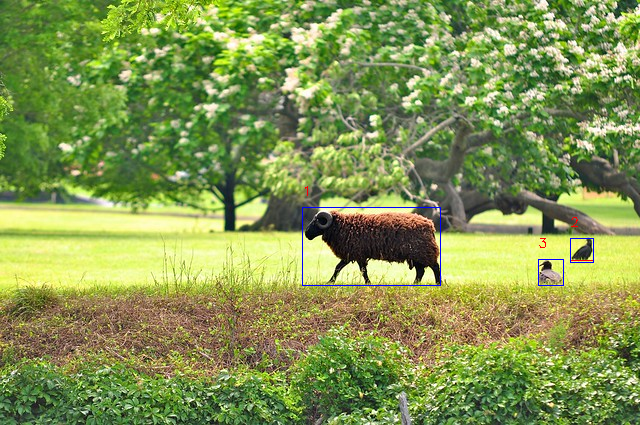

In [15]:

imgcv = cv2.imread('/content/drive/MyDrive/Master/Computer vision/Assignment 2/test imgs/sheep bird3.jpg')

color = (0,0,255)
results = [
{
"left": 302,
"top": 207,
"width": 138,
"height": 78,
"label": "1",
"color":(0,0,255)
},
{
"left": 570,
"top": 238,
"width": 23,
"height": 22,
"label": "2",
"color":(0,0,255)
}
,
{
"left": 538,
"top": 259,
"width": 25,
"height": 26,
"label": "3",
"color":(0,0,255)
},


]

for i in range(len(scores[2])):
  results.append(
      {
    "left": scores[2][i][2][0],
    "top": scores[2][i][2][1],
    "width": scores[2][i][2][2],
    "height": scores[2][i][2][3],
    "label": "",
  "color" : (255,0,0) #blue is for predicted
  }
  )

drawBoundingBoxes(imgcv, './output.png', results)


In [16]:
def calculate_edges(bbox):
  left_x = bbox[0]-(0.5 * bbox[2])
  left_y = bbox[1]-(0.5 * bbox[3])
  right_x= bbox[0]+(0.5 * bbox[2])
  right_y= bbox[1]+(0.5 * bbox[3])

  return [(left_x,left_y),(right_x,right_y)]

In [17]:
def get_intersetion(bbox1,bbox2):
  [(left_x_1,left_y_1),(right_x_1,right_y_1)] = calculate_edges(bbox1)
  [(left_x_2,left_y_2),(right_x_2,right_y_2)] = calculate_edges(bbox2)


  top_left = max(left_x_1,left_x_2) , max(left_y_1,left_y_2)
  btm_right = min(right_x_1,right_x_2) , min(right_y_1,right_y_2)

  if (btm_right[0] - top_left[0] < 0) or (btm_right[1] - top_left[1] < 0):
    return 0

  intersection_area = (btm_right[0] - top_left[0]) * (btm_right[1] - top_left[1])

  return intersection_area


In [18]:
def get_union(bbox1,bbox2):
  area_1 = bbox1[2] * bbox1[3]
  area_2 = bbox2[2] * bbox2[3]
  intersection = get_intersetion(bbox1,bbox2)

  union = area_1 + area_2 - intersection
  return union

In [19]:
def get_iou(bbox1,bbox2):
  return get_intersetion(bbox1,bbox2) / get_union(bbox1,bbox2)

In [20]:
target_scores = [
    [
    (np.array([228,194,70,43]),"Sheep"),
    (np.array([448,192,89,48]),"Sheep"),
    (np.array([295,184,96,51]),"Sheep"),
    (np.array([337,170,31,21]),"Bird"),

    ],
    [
    (np.array([198,241,215,120]),"Sheep"),
    (np.array([389,153,100,57]),"Sheep"),
    (np.array([428,230,97,76]),"Sheep"),
    (np.array([23,155,18,15]),"Bird"),
    (np.array([96,140,16,15]),"Bird"),
    ],

    [
    (np.array([302,207,138,78]),"Sheep"),
    (np.array([570,238,23,22]),"Bird"),
    (np.array([538,259,25,26]),"Bird"),
    ]

]


In [21]:
final_result = []
for i in range(len(scores)):
  final_result.append([])
  for j in range(len(scores[i])):
    ious = []
    for k in range(len(target_scores[i])):
      ious.append(get_iou(target_scores[i][k][0],scores[i][j][2]))
    max_iou = max(ious)
    max_iou_index = ious.index(max_iou)
    final_result[i].append(( "image {}".format(i),target_scores[i][max_iou_index][0],target_scores[i][max_iou_index][1],max_iou,scores[i][j][2],scores[i][j][1], scores[i][j][0]  ))






In [22]:
df1=pd.DataFrame(final_result[0], columns =['Image number','target bbox', 'target class', 'iou','predicted bbox','predicted class','confidence score'])
df2=pd.DataFrame(final_result[1], columns =['Image number','target bbox', 'target class', 'iou','predicted bbox','predicted class','confidence score'])
df3=pd.DataFrame(final_result[2], columns =['Image number','target bbox', 'target class', 'iou','predicted bbox','predicted class','confidence score'])

In [23]:
all_data = pd.concat([df1,df2,df3],axis=0)

In [ ]:
all_data

Image number           target bbox target class       iou  \
0      image 0    [228, 194, 70, 43]        Sheep  0.915433   
1      image 0    [448, 192, 89, 48]        Sheep  0.955063   
2      image 0    [295, 184, 96, 51]        Sheep  0.879498   
3      image 0    [337, 170, 31, 21]         Bird  0.892493   
0      image 1  [198, 241, 215, 120]        Sheep  0.547604   
1      image 1   [389, 153, 100, 57]        Sheep  0.968898   
2      image 1    [428, 230, 97, 76]        Sheep  0.969189   
3      image 1  [198, 241, 215, 120]        Sheep  0.656665   
0      image 2   [302, 207, 138, 78]        Sheep  0.963164   
1      image 2    [570, 238, 23, 22]         Bird  0.874526   
2      image 2    [538, 259, 25, 26]         Bird  0.932695   

                                 predicted bbox predicted class  \
0   [228.24442, 194.75839, 73.878784, 43.30397]           Sheep   
1   [446.77637, 191.76418, 90.38379, 48.910934]           Sheep   
2   [290.07745, 184.21776, 108.23135, 51.41365]           Sheep   
3   [337.46216, 170.9074, 31.930634, 21.825134]           Sheep   
0  [251.14699, 239.96185, 160.39119, 123.63736]           Sheep   
1    [389.9533, 153.12675, 100.51538, 57.72647]           Sheep   
2    [428.40094, 230.8805, 97.80505, 76.477875]           Sheep   
3   [194.53662, 250.55005, 164.0271, 114.80838]           Sheep   
0    [302.9632, 207.92993, 138.65057, 78.63748]           Sheep   
1    [570.1732, 238.63919, 23.51825, 24.602142]            Bird   
2   [538.0018, 259.70438, 25.405945, 26.279724]            Bird   

   confidence score  
0          0.942403  
1          0.921041  
2          0.901004  
3          0.882747  
0          0.990598  
1          0.979615  
2          0.963800  
3          0.947794  
0          0.983868  
1          0.851862  
2          0.759863

In [ ]:
# threshold = 0.5
# min_conf_score = 0.8
# tp1=0
# fp1 = 0
# fn1 = 0

# for i in range(len(df1)):
#   if df1['target class'][i] == df1['predicted class'][i]:
#     if df1['iou'][i] >=3405605158730159
#         fp1 = fp1 + 1
#     else:
#       fp1 = fp1 + 1
#   else :
#     fn1 = fn1 + 1

In [25]:
sorted_data=all_data.sort_values(by=['confidence score'],ascending=False)


In [26]:


aps = []
precisions=[]
recalls=[]
thresholds = []
for i in np.arange(0.5,1,0.05):
  threshold = i
  thresholds.append(i)
  min_conf = 0.9

  tp = []
  fp = []
  for i,row in sorted_data.iterrows():
    if row['iou'] > threshold:
      if row['target class'] == row['predicted class']:
        if row['confidence score'] > min_conf:
          tp.append(1)
          fp.append(0)
        else:
          tp.append(0)
          fp.append(1)
      else:
        tp.append(0)
        fp.append(1)
    else:
      tp.append(0)
      fp.append(1)
  sorted_data['TP'] = tp
  sorted_data['FP'] = fp






  cum_TP = []
  for i in range(len(list(sorted_data['TP']))):
    if i == 0:
      cum_TP.append(list(sorted_data['TP'])[0])
    else:
      cum_TP.append(list(sorted_data['TP'])[i] + cum_TP[-1])
  sorted_data['Cum TP'] = cum_TP
  cum_FP = []
  for i in range(len(list(sorted_data['FP']))):
    if i == 0:
      cum_FP.append(list(sorted_data['FP'])[0])
    else:
      cum_FP.append(list(sorted_data['FP'])[i] + cum_FP[-1])
  sorted_data['Cum FP'] = cum_FP
  precision = []
  for i in range(len(list(sorted_data['FP']))):
    p = list(sorted_data['Cum TP'])[i] / ( list(sorted_data['Cum FP'])[i] + list(sorted_data['Cum TP'])[i] )
    precision.append(p)
  recall = []
  total_target = 0
  for i in target_scores:
    total_target += len(i)

  for i in range(len(list(sorted_data['FP']))):
    p = list(sorted_data['Cum TP'])[i] / ( total_target )
    recall.append(p)
  precisions.append(precision)
  recalls.append(recall)
  ap = np.trapz(precision, recall)
  aps.append(ap)


In [27]:
sorted_data

Image number           target bbox target class       iou  \
0      image 1  [198, 241, 215, 120]        Sheep  0.547604   
0      image 2   [302, 207, 138, 78]        Sheep  0.963164   
1      image 1   [389, 153, 100, 57]        Sheep  0.968898   
2      image 1    [428, 230, 97, 76]        Sheep  0.969188   
3      image 1  [198, 241, 215, 120]        Sheep  0.656665   
0      image 0    [228, 194, 70, 43]        Sheep  0.915433   
1      image 0    [448, 192, 89, 48]        Sheep  0.955063   
2      image 0    [295, 184, 96, 51]        Sheep  0.879498   
3      image 0    [337, 170, 31, 21]         Bird  0.892494   
1      image 2    [570, 238, 23, 22]         Bird  0.874526   
2      image 2    [538, 259, 25, 26]         Bird  0.932697   

                                 predicted bbox predicted class  \
0  [251.14699, 239.96185, 160.39119, 123.63736]           Sheep   
0    [302.9632, 207.92993, 138.65057, 78.63748]           Sheep   
1   [389.9533, 153.12675, 100.51538, 57.726486]           Sheep   
2   [428.40094, 230.88051, 97.805115, 76.47783]           Sheep   
3  [194.53662, 250.55005, 164.02713, 114.80841]           Sheep   
0   [228.24442, 194.75839, 73.878784, 43.30397]           Sheep   
1   [446.77637, 191.76418, 90.38379, 48.910934]           Sheep   
2   [290.07745, 184.21776, 108.23135, 51.41365]           Sheep   
3    [337.4622, 170.9074, 31.930603, 21.825134]           Sheep   
1    [570.1732, 238.63919, 23.51825, 24.602142]            Bird   
2   [538.0018, 259.70435, 25.405945, 26.279755]            Bird   

   confidence score  TP  FP  Cum TP  Cum FP  
0          0.990598   0   1       0       1  
0          0.983868   1   0       1       1  
1          0.979615   1   0       2       1  
2          0.963800   1   0       3       1  
3          0.947794   0   1       3       2  
0          0.942404   0   1       3       3  
1          0.921041   1   0       4       3  
2          0.901004   0   1       4       4  
3          0.882748   0   1       4       5  
1          0.851861   0   1       4       6  
2          0.759862   0   1       4       7

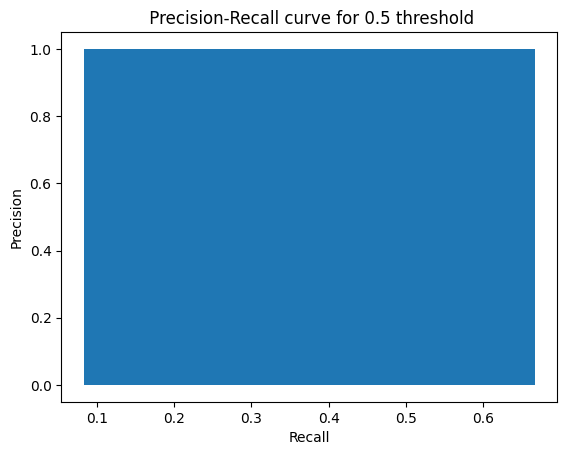

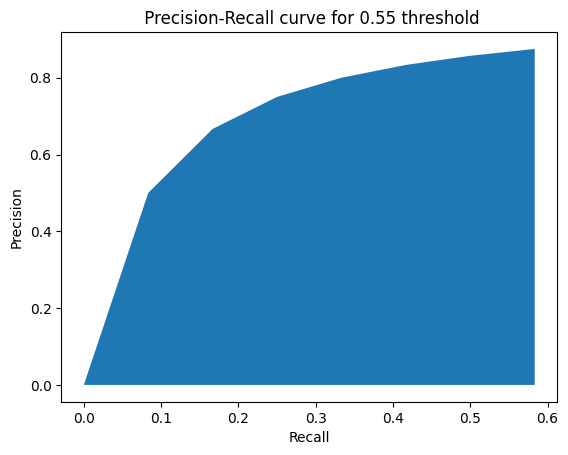

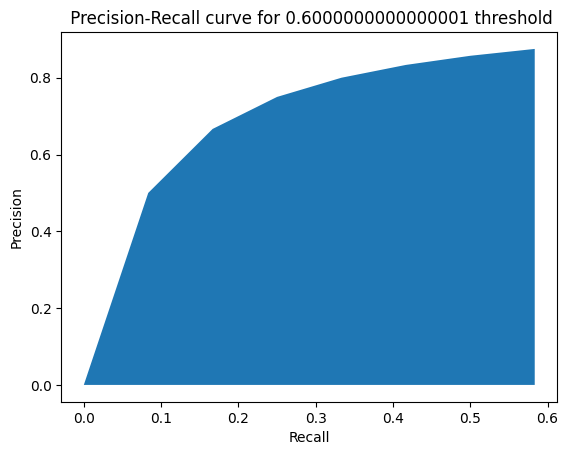

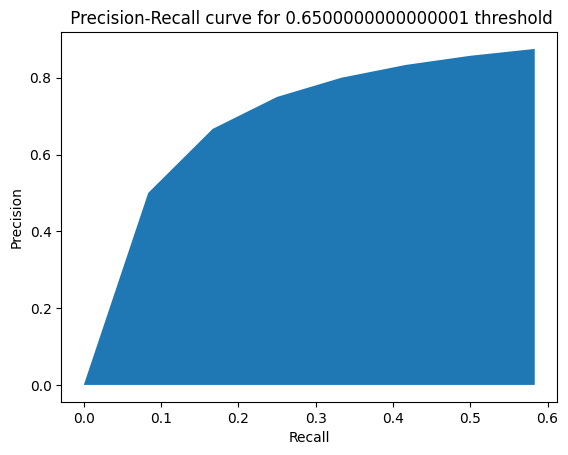

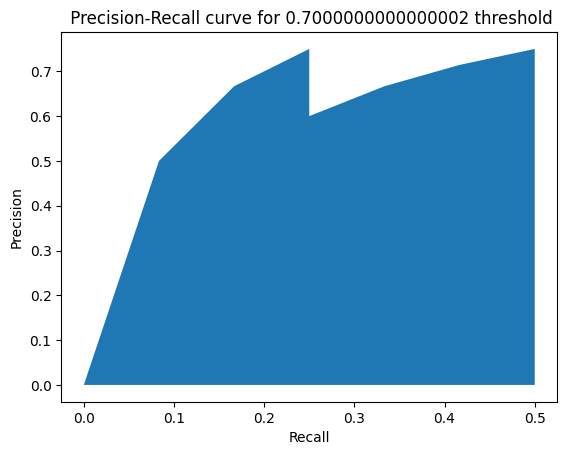

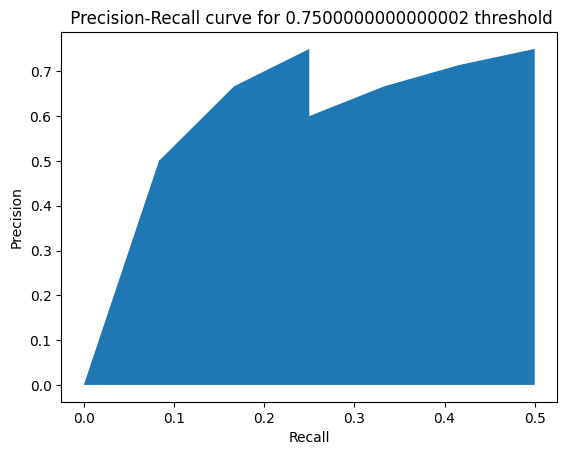

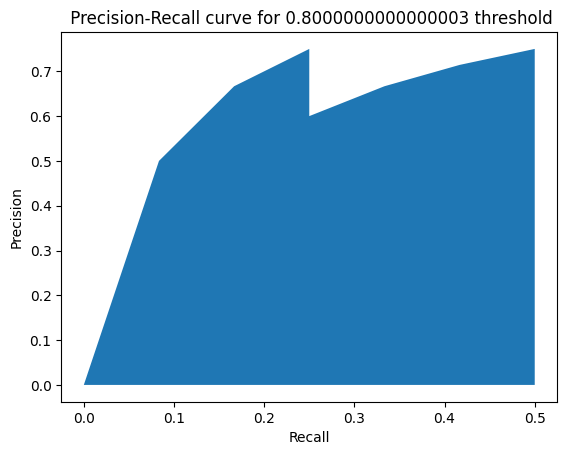

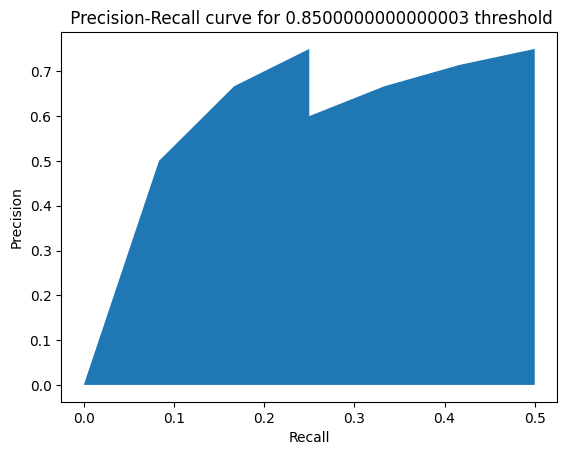

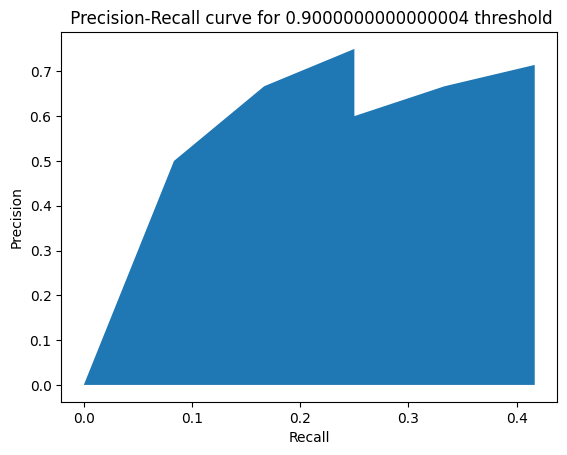

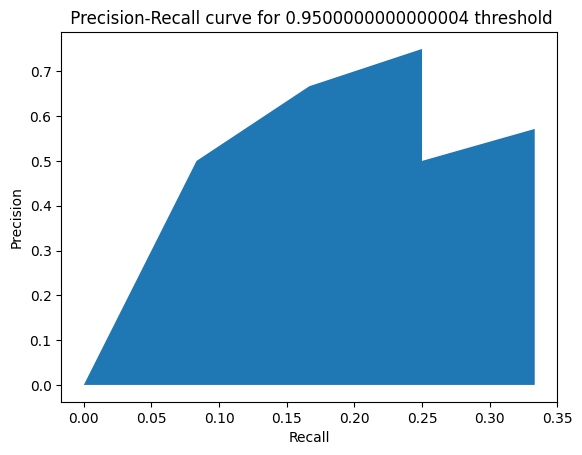

In [ ]:
for i in range(len(precisions)):
    plt.figure()
    plt.fill_between(recalls[i], precisions[i])
    plt.ylabel("Precision")
    plt.xlabel("Recall")
    plt.title(" Precision-Recall curve for {} threshold".format(thresholds[i]))
    plt.show()

In [ ]:
map = sum(aps) / len(aps)
print(map)

0.3405605158730159
